🧠 1. Imports and Setup

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

🧪 2. Load Dataset

In [9]:
# Breast Cancer dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

print(f"Feature shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")
print(f"Class labels: {bc.target_names}")

Feature shape: (569, 30)
Target classes: [0 1]
Class labels: ['malignant' 'benign']


⚙️ 3. Logistic Regression Class Implementation

In [10]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1+np.exp(-z))
    
    def cost_function(self, h, y):
        epsilon = 1e-10
        return (-y * np.log(h+epsilon) + (1-y) * np.log(1-h+epsilon)).mean()
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.losses = []  # Track loss values

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            # Calculate loss and save it
            loss = self.cost_function(predictions, y)
            self.losses.append(loss)

            gw = np.dot(X.T, (predictions-y)) / n_samples
            gb = np.sum(predictions-y) / n_samples

            self.weights -= self.lr * gw
            self.bias -= self.lr * gb

        final_z = np.dot(X, self.weights) + self.bias
        final_h = self.sigmoid(final_z)
        final_cost = self.cost_function(final_h, y)
        return final_cost
    
    def predict(self, X, threshold=0.5):
        linear_pred = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_pred)
        class_pred = [0 if y <= threshold else 1 for y in predictions]
        return class_pred

🧹 4. Split Data and Train the Model

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize and train the model
model = LogisticRegression(lr=0.001, n_iters=1000)
model.fit(X_train, y_train)

C:\Users\abedi\AppData\Local\Temp\ipykernel_15364\4237354860.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))


-1.1161071051483138

📉 5. Plot Training Loss

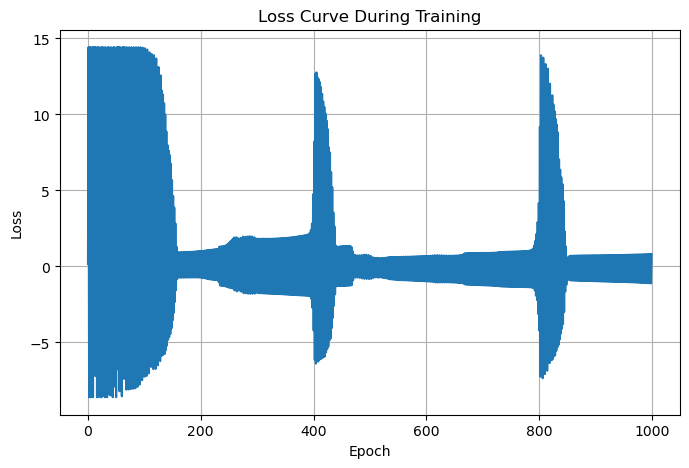

In [12]:
# loss curve
plt.figure(figsize=(8, 5))
plt.plot(model.losses)
plt.title("Loss Curve During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

📊 6. Evaluate Model Performance

C:\Users\abedi\AppData\Local\Temp\ipykernel_15364\4237354860.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))


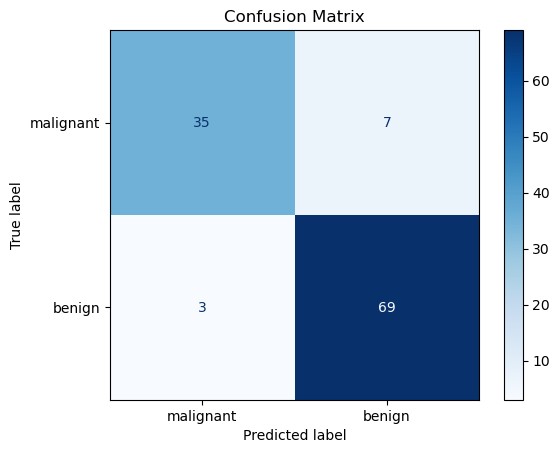

Accuracy: 0.9122807017543859
Precision: 0.9078947368421053
Recall: 0.9583333333333334
F1 Score: 0.9324324324324325


In [13]:
# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bc.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))